# INF200 Lecture No 8

### 26 October 2020

## Today's topics

1. Regular expressions
1. Scientific Python I
    - SymPy
    - Limits of precision
    - NumPy

------------------------

## Regular expressions

- Extremely powerful tool to analyse and manipulate strings
- "Strings on steroids"
- Also available in most editors and IDEs
    - Try in PyCharm's find and replace function!
    - Great way to learn how regular expressions work
- Available in Python through `re` package
- See also
    - https://en.wikipedia.org/wiki/Regular_expression
    - https://docs.python.org/3/library/re.html
    - https://www.jetbrains.com/help/pycharm/regular-expression-syntax-reference.html
    
### Basics

- Define a *pattern*
- Match that pattern against a string
- Optionally, create new string by replacing pattern
- Slightly different "dialects" of the pattern specification language

#### Syntax (extract)

| Symbol | Description |
| - |:- |
| `.` | Matches any single character except newline |
| `*` | Match preceding character any number of times |
| `+` | Match preceding character one or more times |
| `?` | Match preceding character zero or one time |
| `{n}` | Match preceding character exactly n times |
| `{n, m}` | Match preceding character at least n, at most m times |
| `[abc]` | Match any character in brackets |
| `[^abc]` | Match any character *not* in brackets |
| `[a-z]` | Match any character from a-z |
| `\b` | Match word boundary |
| `\d` | Match digit |
| `\s` | Match whitespace |
| `\w` | Match word character (`[A-Za-z0-9]`) |
| `^` | Matches beginning of input |
| `$` | Matches end of input |
| `()`| Subexpression, can be referenced later |
| `\(`, `\)` | Required to include parentheses in pattern |

### Examples in PyCharm

#### Print
- Transform `print` statements in Python 2 code into `print()` calls in Python 3
- Search expression 
        print\s+(.*)$

- Replacement expression
        print($1)

- Note that PyCharm uses `$n` to refer to subexpressions in the replacement text, not `\n`

#### Object
- Remove explicit subclassing from `object` from class definitions
- Search expression
        class\s+(.*)\s*\(\s*object\s*\)\s*:
- Replacement expression
        class $1:
        

### Regular expressions in Python

- `re` module
- See also 
    - https://docs.python.org/3/library/re.html
    - https://docs.python.org/3/howto/regex.html#regex-howto

#### Some useful functions

- `re.search(pattern, string)` finds first match of pattern in string
- `re.match(pattern, string)` as `search()`, but match only at beginning of string
- `re.findall(pattern, string)` finds all matches of pattern in string
- `re.split(pattern, string)` split string on pattern and return list of parts
- `re.sub(pattern, replacement, string)` replaces all occurances of pattern in string with replacement
- `re.compile(pattern)` returns regular expression object, improves efficiency if same RE is used many times

#### Notes

- REs often contain many backslashes, therefore use Python raw strings to specify REs
- `search()`, `match()`, etc return `match` objects
    - individual matches can be accessed as `match.group(0)`, `match.group(1)`, ...
    
#### Examples 
(based on https://docs.python.org/3/library/re.html#regular-expression-examples)

##### Simple searching

In [1]:
import re
m = re.search('c', 'abcdef')
m

<re.Match object; span=(2, 3), match='c'>

In [2]:
m.group(0)

'c'

In [3]:
re.match('a', 'abcdef')

<re.Match object; span=(0, 1), match='a'>

In [4]:
re.match('c', 'abcdef')

Returned `None` because `match()` only matches at the beginning of the string

###### Find first a

In [5]:
re.search('a', 'This is a short and silly text, a plain example.')

<re.Match object; span=(8, 9), match='a'>

###### Find all a's

In [6]:
re.findall('a', 'This is a short and silly text, a plain example.')

['a', 'a', 'a', 'a', 'a']

##### Find isolated a's

- `\b` is word boundary
- Use raw string for pattern

In [7]:
re.findall(r'\ba\b', 'This is a short and silly text, a plain example.')

['a', 'a']

##### Find all words containing an a

In [8]:
re.findall(r'\b\w*a\w*\b', 'This is a short and silly text, a plain example.')

['a', 'and', 'a', 'plain', 'example']

###### Surround all words containing an a with apostrophes

In [9]:
re.sub(r'\b(\w*a\w*)\b', r'"\1"', 'This is a short and silly text, a plain example.')

'This is "a" short "and" silly text, "a" "plain" "example".'

###### The same, but with a compiled re

In [10]:
awords = re.compile(r'\b(\w*a\w*)\b')
text = 'This is a short and silly text, a plain example.'
awords.findall(text)

['a', 'and', 'a', 'plain', 'example']

In [11]:
awords.sub(r'"\1"', text)

'This is "a" short "and" silly text, "a" "plain" "example".'

#### Advanced example: Turning text into a phonebook

In [12]:
text = """Ross McFluff: 834.345.1254 155 Elm Street

Ronald Heathmore: 892.345.3428 436 Finley Avenue
Frank Burger: 925.541.7625 662 South Dogwood Way


Heather Albrecht: 548.326.4584 919 Park Place"""

In [13]:
entries = re.split("\n+", text)
entries

['Ross McFluff: 834.345.1254 155 Elm Street',
 'Ronald Heathmore: 892.345.3428 436 Finley Avenue',
 'Frank Burger: 925.541.7625 662 South Dogwood Way',
 'Heather Albrecht: 548.326.4584 919 Park Place']

In [14]:
[re.split(":? ", entry, maxsplit=3) for entry in entries]

[['Ross', 'McFluff', '834.345.1254', '155 Elm Street'],
 ['Ronald', 'Heathmore', '892.345.3428', '436 Finley Avenue'],
 ['Frank', 'Burger', '925.541.7625', '662 South Dogwood Way'],
 ['Heather', 'Albrecht', '548.326.4584', '919 Park Place']]

- `:?` matches colon after last name
- ` ` matches spaces after first name, phone number
- `maxsplit=3` limits splitting to four parts (three splits)

## Scientific Python

- NumPy
- Matplotlib
- SymPy
- Pandas
- Worked example: Markov Chain Analysis of Chutes & Ladders
- Python Tools for Machine Learning (3 December)


### Note

- This course provides only a brief introduction to Scientific Python
- See especially [J. R. Johansson's book *Numerical Python*](http://jrjohansson.github.io/numericalpython.html)
    - Available for free as [eBook from NMBU network](https://link.springer.com/book/10.1007/978-1-4842-0553-2)
    - [Jupyter Notebooks for the book on Github](https://github.com/jrjohansson/numerical-python-book-code)
- See also 
    - J.R.Johanssons' [Introduction to Scientific Computing with Python](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb)
    - [Python Scienctific Lecture Notes](http://scipy-lectures.github.io/) 

### Version information

- When working with scientific Python, we often use a large stack of packages
- Can be useful to freeze a set of package version using a [conda environment](https://conda.io/docs/user-guide/tasks/manage-environments.html)
- Important to keep track of which versions we are using

#### A little tool to display version information

In [15]:
import importlib

def show_versions(additional_modules=None):
    """
    Displays table of version numbers.
    
    :param additional_modules: Iterable with modules beyond default modules
    """

    modules = ['numpy', 'scipy', 'pandas', 'matplotlib']

    if additional_modules:
        modules += additional_modules
        
    for name in modules:
        try:
            mod = importlib.import_module(name)
        except ImportError:
            print(f'{name:12} module not available')
            continue
            
        try:    
            print(f'{name:12} {mod.__version__:8}')
        except AttributeError:
            print(f'{name:12} no version information')

In [16]:
show_versions()

numpy        1.19.1  
scipy        1.5.2   
pandas       1.1.1   
matplotlib   3.3.1   


In [17]:
show_versions(['seaborn', 'sympy', 'sklearn'])

numpy        1.19.1  
scipy        1.5.2   
pandas       1.1.1   
matplotlib   3.3.1   
seaborn      0.10.1  
sympy        1.6.2   
sklearn      0.23.2  


**NOTE**: The original configuration file for the inf200 conda environment does not include `sympy` and `scikit-learn` (`sklearn`). To install those, activate your inf200 environment and run
```
conda install scikit-learn
conda install sympy
```
On my computer, it turned out to be necessary to install the packages with separate `conda install` calls to avoid some strange choices by the conda package manager (suggestion to remove various `mkl...` packages).

----------

## A *very* short introduction to SymPy

- [SymPy](http://www.sympy.org/en/index.html) provides *computer algebra* in Python
- It allows you to perform *symbolic* manipulations on mathematical expressions (instead of *numerical* calculations)
- Examples based on SymPy documentation

In [18]:
import sympy as sy
sy.init_printing(use_latex=True)

### Simplify expressions

- Before we can use a variable name as a *symbolic* variable, we need to define it as such

In [19]:
x = sy.symbols('x')
sy.simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

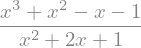

In [20]:
(x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)

### Find the derivative of an expression

$$\frac{d}{dx} \sin(x) e^x$$

- When using mathematical functions in expressions, we need to take them from SymPy

In [21]:
sy.diff(sy.sin(x) * sy.exp(x), x)

### Find the integral of an expression

$$\int e^x\sin x + e^x \cos x dx$$

In [22]:
sy.integrate(sy.exp(x) * sy.sin(x) + sy.exp(x) * sy.cos(x), x)

### Solve equations

- By default, SymPy assumes that the expression should be zero

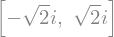

In [23]:
sy.solve(x**2+2, x)

- If the right hand side is not zero, we need to use `Eq`

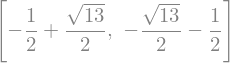

In [24]:
sy.solve(sy.Eq(x**2 + x, 3), x)

- Using `solveset()` we can obtain all solutions

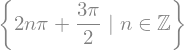

In [25]:
sy.solveset(sy.sin(x)+1, x)

### Some linear algebra

#### Define a matrix

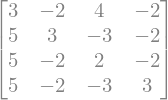

In [26]:
m = sy.Matrix([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])
m

#### Matrix-matrix multiplication

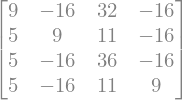

In [27]:
m * m

#### Inverse matrix

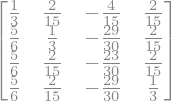

In [28]:
m_inv = m**(-1)
m_inv

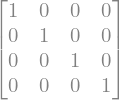

In [29]:
m * m_inv

#### Determinant

In [30]:
m.det()

#### Eigenvalues and eigenvectors

In [31]:
m.eigenvals()

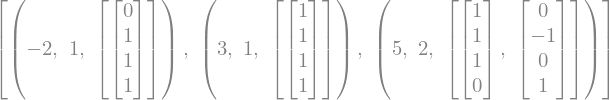

In [32]:
m.eigenvects()

In [33]:
sy.init_printing(use_latex=False)

-------------------------

## Limits of numerical precision

- Computers represent floating point numbers with a fixed number of digits
- Most used today
    - 64-bit floating point numbers (aka "doubles")
    - 53-bit mantissa $\implies$ ca. 16 digits
    - smallest and largest numbers ca. $10^{-308}$ and $10^{308}$
    - details defined in [IEEE754 Standard for Floating-Point Arithmetic](https://en.wikipedia.org/wiki/IEEE_754)
- Machine learning often uses lower precision to gain performance

#### Example

In [34]:
import math

In [35]:
math.exp(math.log(5))

4.999999999999999

The numerical error in this case is

In [36]:
math.exp(math.log(5)) - 5

-8.881784197001252e-16

- This is $-8.8817841970012523\times 10^{-16}$
- Such errors are unavoidable and we need to handle them properly
- *Numerical mathematics* is a branch of mathematics that focuses on how to obtain reliable results efficiently even while working with limited precision

#### Machine precision `eps`

Machine precision is the smallest number for which `1 + x > 1` yields `True`.

In [37]:
x = 1.
while 1 + x > 1:
    x /= 2
print(2*x)

2.220446049250313e-16


This is the typical machine precision for 64-bit floating point numbers.

--------------------------
### NumPy: Computing with Arrays

- Python lists can contain "anything"
    - Flexible, but requires much space and time
- NumPy
    - Arrays containing a *fixed number* of elements of *the same data type*
    - Compact and efficient storage
    - Many mathematical operations can be applied to entire array

In [38]:
import numpy as np
import math

In [39]:
x = np.array([0, 1., 2, 3, 4, 5, 6])
3 * x + 2

array([ 2.,  5.,  8., 11., 14., 17., 20.])

### Array properties
- `ndim`: number of dimensions
- `size`: total number of elements
- `shape`: rows, columns, ...
- `dtype`: data type of elements
- `nbytes`: number of bytes occupied by data

In [40]:
print('x.ndim  :', x.ndim)
print('x.size  :', x.size)
print('x.shape :', x.shape)
print('x.dtype :', x.dtype)
print('x.nbytes:', x.nbytes)

x.ndim  : 1
x.size  : 7
x.shape : (7,)
x.dtype : float64
x.nbytes: 56


##### Example: 2-dim array of 8-bit integers

In [41]:
i8 = np.array([[10, 20], [-10, -20], [127, 220]], dtype=np.int8)
i8

array([[ 10,  20],
       [-10, -20],
       [127, -36]], dtype=int8)

In [42]:
print('i8.ndim  :', i8.ndim)
print('i8.size  :', i8.size)
print('i8.shape :', i8.shape)
print('i8.dtype :', i8.dtype)
print('i8.nbytes:', i8.nbytes)

i8.ndim  : 2
i8.size  : 6
i8.shape : (3, 2)
i8.dtype : int8
i8.nbytes: 6


- Note: The entry value `220` has been wrapped into the value range `-128..127` of 8-bit integers


### Creating Arrays

#### Numbers with fixed spacing: `linspace(a, b)`
- Creates array with 50 numbers from $a$ to $b$
- Both $a$ and $b$ er included
- Fixed interval between numbers: $(b-a)/49$
- You get an array with 100 numbers using `linspace(a, b, num=100)`

In [43]:
np.linspace(1, 50)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

In [44]:
np.linspace(0, 1, num=11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

#### Numbers with logarithmic spacing: `logspace(a, b)`

- Creates array with 50 numbers from $10^a$ to $10^b$
- Both $10^a$ and $10^b$ are included
- Logarithmic distance between numbers (fixed factor)

In [45]:
np.logspace(-1, 1, num=10)

array([ 0.1       ,  0.16681005,  0.27825594,  0.46415888,  0.77426368,
        1.29154967,  2.15443469,  3.59381366,  5.9948425 , 10.        ])

#### Some other functions generating arrays

- take shape as first argument, data type is optional (default is `float`)
- `zeros()`: array of zeros of given size
- `ones()`: array of ones of given size
- `empty()`: array with uninitialized data
- `arange()`: similar to range, really useful only for arrays of integers
- `*_like()`: create array with same shape as argument

In [46]:
np.empty(10)

array([ 0.1       ,  0.16681005,  0.27825594,  0.46415888,  0.77426368,
        1.29154967,  2.15443469,  3.59381366,  5.9948425 , 10.        ])

- Note that the content if an array created with `empty()` is entirely unpredictable!

### Working with data in multiple dimension

- We will stick to one and two dimensions here
- Key concepts:
    - Operations are applied element-wise if both operands have same size
    - Otherwise, NumPy attempts to *broadcast*
        - The smaller operand is replicated as many times as necessary to create an array that matches the larger operand
        - The operation is then applied element-wise

#### Example: array and array of same size

In [47]:
a = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[10, 20], [30, 40], [50, 60]])
print(a)
print(b)
print(a+b)

[[1 2]
 [3 4]
 [5 6]]
[[10 20]
 [30 40]
 [50 60]]
[[11 22]
 [33 44]
 [55 66]]


In [48]:
a * b

array([[ 10,  40],
       [ 90, 160],
       [250, 360]])

- Note: Element-wise multiplication, not matrix multiplication in mathematical sense!

#### Mathematical matrix-matrix/matrix-vector multiplication

- Available in Python 3.5 and later

In [49]:
a @ b

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

In [50]:
a @ b.T

array([[ 50, 110, 170],
       [110, 250, 390],
       [170, 390, 610]])

#### Example: array and scalar

In [51]:
a + 100

array([[101, 102],
       [103, 104],
       [105, 106]])

#### Example: 2D- and 1D arrays

In [52]:
c = np.array([100, 200])
c

array([100, 200])

In [53]:
a + c

array([[101, 202],
       [103, 204],
       [105, 206]])

- `c` has been added to each row of `a`
- What happens for 3-element array?

In [54]:
d = np.array([10, 20, 30])
d

array([10, 20, 30])

In [55]:
a + d

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

- NumPy sees `d` as 1x3 vector, so shape does not fit
- Need to transpose first!
- But because `d` has only one dimension, transposing it has no effect

In [56]:
d.T

array([10, 20, 30])

- We need to define a two-dimensional array that has one row and three columns (note the extra brackets!)
- That can be transposed

In [57]:
dd = np.array([[10, 20, 30]])
dd

array([[10, 20, 30]])

In [58]:
dd.T

array([[10],
       [20],
       [30]])

In [59]:
a + dd.T

array([[11, 12],
       [23, 24],
       [35, 36]])

### Indexing and slicing arrays

- We can access array elements as for mathematical matrices
- In Python, indices run from 0, not from 1
- The first index indicates the row, the second the column
- One is often interested in picking out a subset of elements, eg a column
- This is called *slicing*, same logic as for Python lists

### Arrays vs Lists

- NumPy arrays differ in several ways from Python lists, especially
    - arrays have fixed size
    - all entries in an array have the same data type (exceptions apply)
- This makes arrays much more efficient in time and space than lists

##### Performance comparison

- List and array with 1.000.000 entries
- Compute sine of all elements

In [60]:
lx = list(range(0, 1000000))
ax = np.array(lx)

In [61]:
%timeit sinlx = [math.sin(x) for x in lx]

139 ms ± 2.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [62]:
%timeit sinax = np.sin(ax)

11.2 ms ± 325 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


- NumPy is *significantly* faster than list comprehension
- This applies mainly when we apply NumPy functions to large arrays
- For scalars, `math` functions are usually faster than `numpy` functions

#### Arrays slices are view: An important difference from lists

- See also [Copies and Views Tutorial](http://scipy-lectures.github.io/intro/numpy/array_object.html#copies-and-views)
- Array slices are so-called *views*:
    - If `a` is a Numpy array, and `b = a[m:n:s]`, then `b` is a *view* of array `a`
    - `a` and `b` are distinct objects (i.e., `id(a) != id(b)`)
    - `a` and `b` are both of type `numpy.ndarray`
    - `a` and `b` ***share the same underlying data***: `b` just restricts what we see of the data in `a`
    - Therefore, any change to data in `b` also affects data in `a`

In [63]:
a = np.array([1, 2, 3, 4, 5])
b = a[:3]
b[0] = 10
print(a)
print(b)

[10  2  3  4  5]
[10  2  3]


- In contrast, slicing a list gives a new list object

In [64]:
l = [1, 2, 3, 4, 5]
k = l[:3]
k[0] = 10
print(l)
print(k)

[1, 2, 3, 4, 5]
[10, 2, 3]


##### Summary: list *vs* array slicing

- For a normal Python *list* `l`, `l[:]` is a *copy*  of the elements in `l`, i.e., a new list object, that can be manipulated without affecting `l`. 
- For an array `a`, `a[:]` is a *view* of `a` with the same underlying data as `a` and changing data through this view *will change* the data in `a`.